<a href="https://colab.research.google.com/github/dlkt101101/AMATH-445/blob/main/AMATH445_A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AMATH 445
## Assignment 1
Prepared by: Darren Alexander Lam Kin Teng (20977843)

# Question 1


## 1a

1. From a given confusion matrix, we will get values for true positive (TP), true negative (TN), false positive (FP) and false negative (FP).
$$Precision = \frac{TP}{TP+FP}$$
$$Recall = \frac{TP}{TP + FN}$$

**Precision** is a measure of accuracy of the positive predictions out of all the instances that the model interpreted as positive (i.e. TP + FP).\
\
**Recall** is a measure of accuracy of the positive predictions out of all actual positive cases (i.e. TP + FN).\
\
2. $$Accuracy = \frac{TP+TN}{TP+TN+FP+FN}$$
Accuracy alone can be a misleading metric for a classification problem as it does not represent the model's true performance well in the case of imbalanced data.\
For instance, if we have an imbalanced dataset where true labels are 5% of the data and 95% are negative labels. A model could predict all data points as negative. Therefore, accuracy = 95%, precision = $\frac{0}{0}$ and recall = 0%. Model performs poorly at predicting the true labels, based on the recall and precision, despite accuracy showing favourable results.

## 1b Data Preprocessing

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report

Importing the dataset

In [2]:
data = pd.read_csv('/content/Cell viability and extrusion dataset V1.csv')

In [3]:
data.columns

Index(['Reference', 'DOI', 'Final_Alginate_Conc_(%w/v)',
       'Final_Gelatin_Conc_(%w/v)', 'Final_GelMA_Conc_(%w/v)',
       'Final_Hyaluronic_Acid_Conc_(%w/v)', 'Final_MeHA_Conc_(%w/v)',
       'Final_NorHA_Conc_(%w/v)', 'Final_Fibroin/Fibrinogen_Conc_(%w/v)',
       'Final_P127_Conc_(%w/v)', 'Final_Collagen_Conc_(%w/v)',
       'Final_Chitosan_Conc_(%w/v)', 'Final_CS-AEMA_Conc_(%w/v)',
       'Final_TCP_Conc_(%w/v)', 'Final_Gellan_Conc_(%w/v)',
       'Final_Nano/Methycellulose_Conc_(%w/v)', 'Final_PEGTA_Conc_(%w/v)',
       'Final_PEGMA_Conc_(%w/v)', 'Final_PEGDA_Conc_(%w/v)',
       'Final_Agarose_Conc_(%w/v)', 'CaCl2_Conc_(mM)', 'NaCl2_Conc_(mM)',
       'BaCl2_Conc_(mM)', 'SrCl2_Conc_(mM)',
       'Physical_Crosslinking_Durantion_(s)', 'Photocrosslinking_Duration_(s)',
       'Extrusion_Pressure (kPa)', 'Extrusion_Rate_Lengthwise_(mm/s)',
       'Extrusion_Rate_Volume-wise_(mL/s)', 'Nozzle_Movement_Speed_(mm/s)',
       'Inner_Nozzle_Outer_Diameter_(µm)', 'Outer_Nozzle_Inner_Di

* Columns `Reference` and `DOI` are dropped since these are not features affecting cell viability. These are only for references.<br>
* `Acceptable_Pressure_(Yes/No)` is dropped due to assignment instructions.<br>
* The target variable (`Acceptable_Viability_(Yes/No)`) is a direct binary transformation of `Viability_at_time_of_observation_(%)`. The latter needs to be dropped for a classification task.

In [4]:
df = data.copy()
df.drop(labels=['Reference', 'DOI', 'Acceptable_Pressure_(Yes/No)', 'Viability_at_time_of_observation_(%)'], axis=1, inplace=True)
df.head()

,Final_Alginate_Conc_(%w/v),Final_Gelatin_Conc_(%w/v),Final_GelMA_Conc_(%w/v),Final_Hyaluronic_Acid_Conc_(%w/v),Final_MeHA_Conc_(%w/v),Final_NorHA_Conc_(%w/v),Final_Fibroin/Fibrinogen_Conc_(%w/v),Final_P127_Conc_(%w/v),Final_Collagen_Conc_(%w/v),Final_Chitosan_Conc_(%w/v),...,DI_Water_Used?,Precrosslinking_Solution_Used?,Saline_Solution_Used?,EtOH_Solution_Used?,Photoinitiator_Used?,Enzymatic_Crosslinker_Used?,Matrigel_Used?,Conical_or_Straight_Nozzle,Primary/Not_Primary,Acceptable_Viability_(Yes/No)
0,2.0,0.0,0.0,0.0,0,0,0.0,0,0.0,0,...,N,N,N,N,N,N,N,S,Primary,Y
1,2.0,0.0,0.0,0.0,0,0,0.0,0,0.0,0,...,N,N,N,N,N,N,N,S,Primary,N
2,2.0,0.0,0.0,0.0,0,0,0.0,0,0.0,0,...,N,N,N,N,N,N,N,S,Primary,Y
3,0.0,0.0,0.0,0.0,0,0,0.0,0,0.0,0,...,N,N,N,N,N,N,N,S,Primary,Y
4,0.0,0.0,0.0,0.0,0,0,0.0,0,0.0,0,...,N,N,N,N,N,N,N,S,Primary,N


In [5]:
df.shape

(617, 47)

### Handling missing values for bioink temperature as described in the paper

In [6]:
df['Syringe_Temperature_(°C)'] = df['Syringe_Temperature_(°C)'].fillna(22)

### Removing features with more than 50% missing or zero values

In [7]:
null_percentage = round(df.isnull().sum()/df.shape[0] * 100,2)
null_percentage_50_names = null_percentage[null_percentage > 50].index
df.drop(labels=null_percentage_50_names, axis=1, inplace=True)
print("""Dropped columns with more than > 50% null values.
{}""".format(list(null_percentage_50_names)))


Dropped columns with more than > 50% null values.
['Extrusion_Rate_Lengthwise_(mm/s)', 'Extrusion_Rate_Volume-wise_(mL/s)', 'Nozzle_Movement_Speed_(mm/s)', 'Fiber_Spacing_(µm)']


In [8]:
cols_object = df.select_dtypes(include=['object']).columns.tolist()
cols_numericals = df.select_dtypes(include=['number']).columns.tolist()

print('''All columns included: {}'''.format(len(cols_numericals) + len(cols_object) == df.shape[-1]))

All columns included: True


### Imputing missing values using KNNImputer and SimpleImputer from scikit-learn

In [9]:
cols_missing_value = df.isna().sum()
cols_to_impute = cols_missing_value[cols_missing_value > 0].index
cols_to_impute

Index(['Final_Collagen_Conc_(%w/v)', 'Final_PEGMA_Conc_(%w/v)',
       'CaCl2_Conc_(mM)', 'NaCl2_Conc_(mM)',
       'Physical_Crosslinking_Durantion_(s)', 'Extrusion_Pressure (kPa)',
       'Outer_Nozzle_Inner_Diameter_(µm)', 'Fiber_Diameter_(µm)',
       'Cell_Density_(cells/mL)', 'Substrate_Temperature_(°C)',
       'Conical_or_Straight_Nozzle'],
      dtype='object')

In [10]:
object_cols_to_impute = list(set(cols_object).intersection(set(cols_to_impute)))
object_cols_to_impute

['Fiber_Diameter_(µm)', 'Conical_or_Straight_Nozzle']

`Fiber_Diameter_(µm)` is supposed to be numerical but is type `object`. This needs to be fixed by removing any leading or trailing text.

In [11]:
df['Fiber_Diameter_(µm)'] = df['Fiber_Diameter_(µm)'].str.extract(r'(\d+\.?\d*)').astype(float)
cols_numericals = df.select_dtypes(include=['number']).columns.tolist()

In [12]:
cols_object = df.select_dtypes(include=['object']).columns.tolist()
df[cols_object] = df[cols_object].astype('category')

In [13]:
object_cols_to_impute = list(set(cols_object).intersection(set(cols_to_impute)))
object_cols_to_impute

['Conical_or_Straight_Nozzle']

`Conical_or_Straight_Nozzle` is a categroical data that cannot be imputed using KnnImputer. SimpleImputer will be used and replace missing values with the mode category.

In [14]:
simpleimputer = SimpleImputer(strategy = "most_frequent")

In [15]:
df[object_cols_to_impute] = simpleimputer.fit_transform(df[object_cols_to_impute])

In [16]:
numerical_cols_to_impute = list(set(cols_to_impute).intersection(set(cols_numericals)))
numerical_cols_to_impute

['NaCl2_Conc_(mM)',
 'Final_PEGMA_Conc_(%w/v)',
 'Physical_Crosslinking_Durantion_(s)',
 'CaCl2_Conc_(mM)',
 'Fiber_Diameter_(µm)',
 'Final_Collagen_Conc_(%w/v)',
 'Substrate_Temperature_(°C)',
 'Extrusion_Pressure (kPa)',
 'Cell_Density_(cells/mL)',
 'Outer_Nozzle_Inner_Diameter_(µm)']

Imputing numerical columns

In [17]:
knnimputer = KNNImputer(n_neighbors=30)

In [18]:
df[numerical_cols_to_impute] = knnimputer.fit_transform(df[numerical_cols_to_impute])

In [19]:
df.isna().sum().sum()
print("All missing values filled: {}". format(0 == df.isna().sum().sum()))

All missing values filled: True


### One Hot Encode categorical data

In [20]:
df[cols_object].nunique()

,0
Cell_Culture_Medium_Used?,2
DI_Water_Used?,2
Precrosslinking_Solution_Used?,2
Saline_Solution_Used?,2
EtOH_Solution_Used?,2
Photoinitiator_Used?,2
Enzymatic_Crosslinker_Used?,2
Matrigel_Used?,2
Conical_or_Straight_Nozzle,2
Primary/Not_Primary,2


In [21]:
ohe = OneHotEncoder(sparse_output=False, drop="first").set_output(transform="pandas")

In [22]:
encoded_data = ohe.fit_transform(df[cols_object])
df_encoded = df.drop(columns=cols_object).join(encoded_data)

df_encoded.head()

,Final_Alginate_Conc_(%w/v),Final_Gelatin_Conc_(%w/v),Final_GelMA_Conc_(%w/v),Final_Hyaluronic_Acid_Conc_(%w/v),Final_MeHA_Conc_(%w/v),Final_NorHA_Conc_(%w/v),Final_Fibroin/Fibrinogen_Conc_(%w/v),Final_P127_Conc_(%w/v),Final_Collagen_Conc_(%w/v),Final_Chitosan_Conc_(%w/v),...,DI_Water_Used?_Y,Precrosslinking_Solution_Used?_Y,Saline_Solution_Used?_Y,EtOH_Solution_Used?_Y,Photoinitiator_Used?_Y,Enzymatic_Crosslinker_Used?_Y,Matrigel_Used?_Y,Conical_or_Straight_Nozzle_S,Primary/Not_Primary_Primary,Acceptable_Viability_(Yes/No)_Y
0,2.0,0.0,0.0,0.0,0,0,0.0,0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
1,2.0,0.0,0.0,0.0,0,0,0.0,0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,2.0,0.0,0.0,0.0,0,0,0.0,0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
3,0.0,0.0,0.0,0.0,0,0,0.0,0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
4,0.0,0.0,0.0,0.0,0,0,0.0,0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


## Scaling continuous features with `MinMaxScaler`

In [23]:
minmaxScaler = MinMaxScaler().set_output(transform="pandas")

In [24]:
df_encoded[cols_numericals] = minmaxScaler.fit_transform(df_encoded[cols_numericals])
df_encoded_scaled = df_encoded.copy()

In [25]:
df_encoded_scaled.head()

,Final_Alginate_Conc_(%w/v),Final_Gelatin_Conc_(%w/v),Final_GelMA_Conc_(%w/v),Final_Hyaluronic_Acid_Conc_(%w/v),Final_MeHA_Conc_(%w/v),Final_NorHA_Conc_(%w/v),Final_Fibroin/Fibrinogen_Conc_(%w/v),Final_P127_Conc_(%w/v),Final_Collagen_Conc_(%w/v),Final_Chitosan_Conc_(%w/v),...,DI_Water_Used?_Y,Precrosslinking_Solution_Used?_Y,Saline_Solution_Used?_Y,EtOH_Solution_Used?_Y,Photoinitiator_Used?_Y,Enzymatic_Crosslinker_Used?_Y,Matrigel_Used?_Y,Conical_or_Straight_Nozzle_S,Primary/Not_Primary_Primary,Acceptable_Viability_(Yes/No)_Y
0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
1,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


## 1c Decision Tree Classifier

In [26]:
X = df_encoded_scaled.drop(columns=['Acceptable_Viability_(Yes/No)_Y'])
y = df_encoded_scaled['Acceptable_Viability_(Yes/No)_Y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
X_train.columns

Index(['Final_Alginate_Conc_(%w/v)', 'Final_Gelatin_Conc_(%w/v)',
       'Final_GelMA_Conc_(%w/v)', 'Final_Hyaluronic_Acid_Conc_(%w/v)',
       'Final_MeHA_Conc_(%w/v)', 'Final_NorHA_Conc_(%w/v)',
       'Final_Fibroin/Fibrinogen_Conc_(%w/v)', 'Final_P127_Conc_(%w/v)',
       'Final_Collagen_Conc_(%w/v)', 'Final_Chitosan_Conc_(%w/v)',
       'Final_CS-AEMA_Conc_(%w/v)', 'Final_TCP_Conc_(%w/v)',
       'Final_Gellan_Conc_(%w/v)', 'Final_Nano/Methycellulose_Conc_(%w/v)',
       'Final_PEGTA_Conc_(%w/v)', 'Final_PEGMA_Conc_(%w/v)',
       'Final_PEGDA_Conc_(%w/v)', 'Final_Agarose_Conc_(%w/v)',
       'CaCl2_Conc_(mM)', 'NaCl2_Conc_(mM)', 'BaCl2_Conc_(mM)',
       'SrCl2_Conc_(mM)', 'Physical_Crosslinking_Durantion_(s)',
       'Photocrosslinking_Duration_(s)', 'Extrusion_Pressure (kPa)',
       'Inner_Nozzle_Outer_Diameter_(µm)', 'Outer_Nozzle_Inner_Diameter_(µm)',
       'Fiber_Diameter_(µm)', 'Cell_Density_(cells/mL)',
       'Syringe_Temperature_(°C)', 'Substrate_Temperature_(°C)',
   

In [28]:
model_DT = DecisionTreeClassifier(random_state=42)
model_DT.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

Decision Tree Predictions

In [29]:
predictions_DT = model_DT.predict(X_test)

Decision Tree Performance

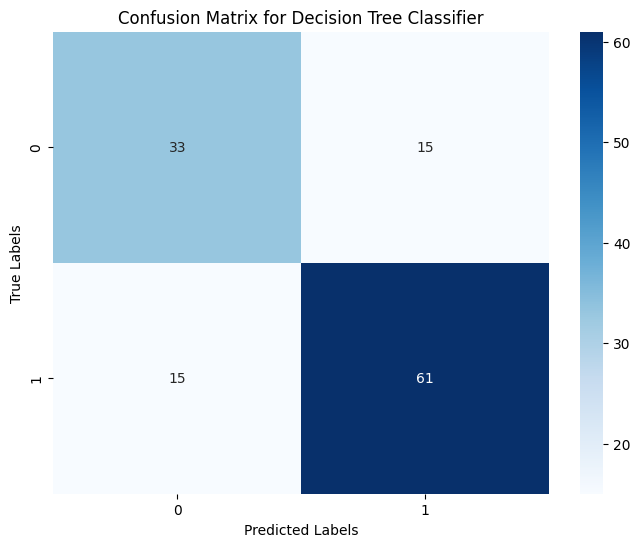

In [30]:
cm_DT = confusion_matrix(y_test, predictions_DT)

plt.figure(figsize=(8,6))
sns.heatmap(cm_DT, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [31]:
DT_report = classification_report(y_test, predictions_DT)
print(DT_report)

              precision    recall  f1-score   support

         0.0       0.69      0.69      0.69        48
         1.0       0.80      0.80      0.80        76

    accuracy                           0.76       124
   macro avg       0.75      0.75      0.75       124
weighted avg       0.76      0.76      0.76       124



## 1d Support Vector Machine (SVM)

In [32]:
model_svmRBF = SVC(random_state=42)
model_svmRBF.fit(X_train, y_train)

SVC(random_state=42)

SVM Radial Basis Function Predictions

In [33]:
predictions_svmRBF = model_svmRBF.predict(X_test)

SVM Performance

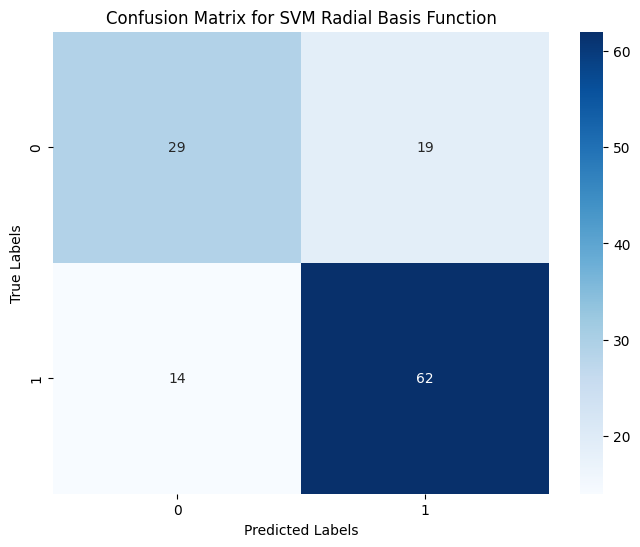

In [34]:
cm_svmRBF = confusion_matrix(y_test, predictions_svmRBF)

plt.figure(figsize=(8,6))
sns.heatmap(cm_svmRBF, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for SVM Radial Basis Function')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [36]:
svmRBF_report = classification_report(y_test, predictions_svmRBF)
print(svmRBF_report)

              precision    recall  f1-score   support

         0.0       0.67      0.60      0.64        48
         1.0       0.77      0.82      0.79        76

    accuracy                           0.73       124
   macro avg       0.72      0.71      0.71       124
weighted avg       0.73      0.73      0.73       124



Based on the classification reports for both the decision tree and the SVM model, the precision for the decision tree (80%) is only slightly higher than for the SVM RBF model (77%). Thus, suggesting that the decision tree has only marginally more reliable positive predictions.<br>

However, SVM RBF's recall is slightly better at 82% compared to 80% for the decision tree. Hence, suggesting that SVM is slightly better at identify positive cases.<br>

Based on the two metrics the performance of both models seem to be comparable to each other at predicting the positive cases. More metrics like F1 score, which is the harmonic mean of both metrics, and accuracy would provide more insight on which model is better. As such, the decision tree has more favourable scores and performs better than the SVM model.

# Question 3

a) When we have linearly separable data, maximizing the likelihood function will cause the coefficients to go to infinity while the sigmoid function produces probabilities from 0 to 1.<br>
<br>
b) If $\lambda  = 0$ then $J(\beta)$ becomes the regular loss function for logistic regression. With the L2 term, the cost function becomes strictly convex and setting $\lambda > 0$ allows for a finite solution. By trying to minimize $J(\beta)$ the model will try to keep $\beta$ as small as possible to avoid the penalty.<br>
<br>
c) As $\lambda → ∞$, the model becomes less complex. This leads to higher bias and lower variance.<br>
<br>
d) Lowering the threshold would allow the model to predict more data points as positive. How this affects the FPR and FNR depends on the context of the problem. Although, lowering the threshold will more likely misclassify true negatives as positives and therfore increase FPR. <br>

A case where lowering the threshold would be useful would be in fraud detection. It is safer to flag more transactions as potential fraud than less.

# Question 4

1. SVM is a distance based algorithm and therefore is sensitive to scaling. In this case, $x_1∈[0, 1]$ and $x_2∈[0,1000]$, both parameters are on different scales.<br>
The linear SVM tries to maximize the margin between the data points by using the Euclidean distance. The squared difference for x_1  will not be as significant as for x_2

2. A soft margin only has one regularization parameter, C, which treats every mistake with an equal weight. Since there is a large amount of the data being negative (99%), the summation of the slack variables is dominated by the negative class. <br>
If the soft margin is maximized, it could happen that all of 1% of the positive data is being misclassified while the 99% of negative data are correctly classified. The positive cases will always be misclassified but the model will show 99% accuracy but 0 recall for positive cases.

3. A weighted SVM where the cost parameter, C, is different for each class by weighing more on the minority class. As a result the objective function changes to:<br>
Let $C^+$  be the cost for the positive class and $C^−$  be the cost for the negative class.
Also i is the index for all positive classes and j the index for negative classes.
$$\underset{w,b,\xi}{\min} \frac{1}{2}||w||^2+C^+ \sum^{n_1}_{i=1}\xi^{+}_i+C^-\sum^{n_2}_{j=1}\xi^-_j$$